###### Adapted from the `CS228` Python Tutorial, and "10 Steps to Become a Data Scientist"

## Basics of Python

I would suggest using python 3 instead of python 2 as the grammars are slightly different.

### Basic data types:  numbers (integers, floats, etc.), booleans (True, False), strings

In [1]:
# number
x = 3
print(x)
x = x + 1
print(x)  # Prints "4"
x *= 2
print(x)  # Prints "8"

3
4
8


Python implements all of the usual operators for Boolean logic, but uses English words rather than symbols (`&&`, `||`, etc.):

In [2]:
# boolean
t, f = True, False
print(t and f, not t, not f, t or f)

False False True True


In [9]:
# string
hw = 'hello' + ' ' + 'world'  # String concatenation
print(hw)  # prints "hello world"

hello world


You can find relative information in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#).

### Containers: lists, dictionaries, sets, tuples

A list is the Python equivalent of an array, but is resizeable and can contain elements of different types:

In [10]:
# list
xs = [3, 1, 'foo']   # Create a list
print (xs, xs[2], xs[-1])     # Negative indices count from the end of the list; prints "2"

[3, 1, 'foo'] foo foo


As usual, you can find all the gory details about lists in the [documentation](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists).

You can loop over the elements of a list like this:

In [11]:
animals = ['cat', 'dog', 'monkey']
for animal in animals:
    print(animal)
for idx, animal in enumerate(animals):
    print('#{:d}: {:s}'.format(idx + 1, animal))

cat
dog
monkey
#1: cat
#2: dog
#3: monkey


#### Dictionaries

A dictionary stores (key, value) pairs, similar to a `Map` in Java or an object in Javascript. You can use it like this:

In [52]:
d = {'cat': 1, 1: 'word'}  # Create a new dictionary with some data
print(d['cat'], d[1])       # Get an entry from a dictionary; prints "cute"
print('cat' in d)     # Check if a dictionary has a given key; prints "True"

1 word
True


You can find all you need to know about dictionaries in the [documentation](https://docs.python.org/3.7/library/stdtypes.html#dict).

#### Sets

A set is an unordered collection of distinct elements. As a simple example, consider the following:

In [13]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Check if an element is in a set; prints "True"
print('fish' in animals)  # prints "False"


True
False


#### Tuples

A tuple is an (immutable) ordered list of values. A tuple is in many ways similar to a list; one of the most important differences is that tuples can be used as keys in dictionaries and as elements of sets, while lists cannot. Here is a trivial example:

In [14]:
d = {(x, x + 1): x for x in range(10)}  # Create a dictionary with tuple keys
t = (5, 6)       # Create a tuple
print(type(t))
print(d[t])  
print(d[(1, 2)])

<class 'tuple'>
5
1


### Functions

Python functions are defined using the `def` keyword. For example:

In [15]:
def sign(x):
    if x > 0:
        return 'positive'
    elif x < 0:
        return 'negative'
    else:
        return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

negative
zero
positive


### Classes

The syntax for defining classes in Python is straightforward:

In [16]:
class Greeter:

    # Constructor
    def __init__(self, name):
        self.name = name  # Create an instance variable

    # Instance method
    def greet(self, loud=False):
        if loud:
            print('HELLO, {:s}!'.format(self.name.upper()))
        else:
            print('Hello, {:s}'.format(self.name))

g = Greeter('Fred')  # Construct an instance of the Greeter class
g.greet()            # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)   # Call an instance method; prints "HELLO, FRED!"

Hello, Fred
HELLO, FRED!


## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. To use Numpy, we first need to import the `numpy` package:

In [17]:
import numpy as np

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [19]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)                  

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [20]:
a.resize(3, 3) # resize changes the shape and size of array in-place.
print(a)

[[5 2 3]
 [0 0 0]
 [0 0 0]]


Numpy also provides many functions to create arrays:

In [21]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [22]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [23]:
c = np.full((2,2), 7) # Create a constant array
print(c) 

[[7 7]
 [7 7]]


In [24]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [26]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.50637711 0.48853527]
 [0.97849591 0.69275107]]


### Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [28]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)
# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [31]:
print(a[0, 1])  
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) 

77
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [32]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [33]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [34]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [35]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [36]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [37]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [38]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [39]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

<br>
**Dot Product:**  

$ \begin{bmatrix}x_1 \ x_2 \ x_3\end{bmatrix}
\cdot
\begin{bmatrix}y_1 \\ y_2 \\ y_3\end{bmatrix}
= x_1 y_1 + x_2 y_2 + x_3 y_3$

In [40]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


In [41]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))

[29 67]
[29 67]


In [42]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [43]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))   # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [44]:
print(x)
print(x.T)
v = np.array([[1,2,3]])
print(v)
print(v.T)

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]
[[1 2 3]]
[[1]
 [2]
 [3]]


### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

<a id="23"></a> <br>
<img src='http://scipy-lectures.org/_images/numpy_broadcasting.png'>
[Image Credit](http://scipy-lectures.org/intro/numpy/operations.html)

Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [45]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [46]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

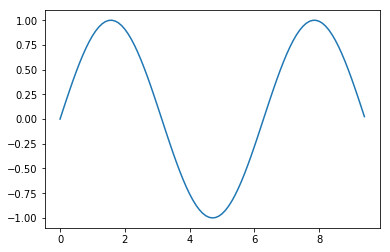

In [47]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

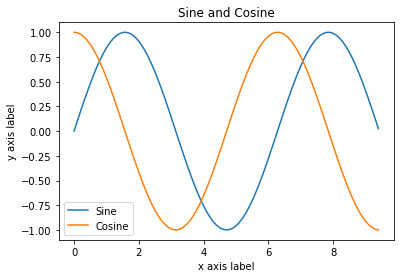

In [48]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

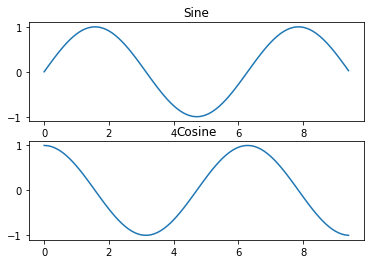

In [49]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).